In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# импортируем библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [3]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
# !pip freeze > requirements.txt

In [3]:
# Подгрузим наши данные из соревнования

DATA_DIR = 'C:/Users/d3en/OneDrive/Рабочий стол/dataScience/IDE/PROJECT-3. EDA + Feature Engineering. Соревнование на Kaggle/data_3/kaggle'
df_train = pd.read_csv(DATA_DIR+'/hotels_train.csv') # датасет для обучения
df_test = pd.read_csv(DATA_DIR+'/hotels_test.csv') # датасет для предсказания
sample_submission = pd.read_csv(DATA_DIR+'/submission.csv') # самбмишн

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

In [5]:
df_train.head(2)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097


In [22]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128935 entries, 0 to 128934
Data columns (total 16 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               128935 non-null  object 
 1   additional_number_of_scoring                128935 non-null  int64  
 2   review_date                                 128935 non-null  object 
 3   average_score                               128935 non-null  float64
 4   hotel_name                                  128935 non-null  object 
 5   reviewer_nationality                        128935 non-null  object 
 6   negative_review                             128935 non-null  object 
 7   review_total_negative_word_counts           128935 non-null  int64  
 8   total_number_of_reviews                     128935 non-null  int64  
 9   positive_review                             128935 non-null  object 
 

In [6]:
df_test.head(2)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,tags,days_since_review,lat,lng
0,Via Senigallia 6 20161 Milan Italy,904,7/21/2017,8.1,Hotel Da Vinci,United Kingdom,Would have appreciated a shop in the hotel th...,52,16670,Hotel was great clean friendly staff free bre...,62,1,"[' Leisure trip ', ' Couple ', ' Double Room '...",13 days,45.533137,9.171102
1,Arlandaweg 10 Westpoort 1043 EW Amsterdam Neth...,612,12/12/2016,8.6,Urban Lodge Hotel,Belgium,No tissue paper box was present at the room,10,5018,No Positive,0,7,"[' Leisure trip ', ' Group ', ' Triple Room ',...",234 day,52.385649,4.834443


In [7]:
sample_submission.head(2)

,reviewer_score,id
0,1,488440
1,10,274649


In [8]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128935 entries, 0 to 128934
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   reviewer_score  128935 non-null  int64
 1   id              128935 non-null  int64
dtypes: int64(2)
memory usage: 2.0 MB


In [4]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['reviewer_score'] = 0 # в тесте у нас нет значения reviewer_score, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [5]:
# data['negative_review'].value_counts().nlargest(10)
data['positive_review'].value_counts().nlargest()

No Positive    35946
 Location       9222
 Everything     2284
 location       1677
 Nothing        1243
Name: positive_review, dtype: int64

In [6]:
# Мой код и изменения


# data = data.drop('additional_number_of_scoring', axis=1)
data['review_date'] = pd.to_datetime(data['review_date'])

In [7]:
data['lat'] = data['lat'].fillna(data['lat'].median())
data['lng'] = data['lng'].fillna(data['lng'].median())

In [8]:
mask12 = (data['review_date'].dt.month ==12) 
mask1= (data['review_date'].dt.month <3)
mask2 = (data['review_date'].dt.month >2) & (data['review_date'].dt.month <6)
mask3 = (data['review_date'].dt.month >5) & (data['review_date'].dt.month <9)
mask4 = (data['review_date'].dt.month >8) & (data['review_date'].dt.month <12)

In [9]:
data['reviewer_nationality'].value_counts()

 United Kingdom               245246
 United States of America      35437
 Australia                     21686
 Ireland                       14827
 United Arab Emirates          10235
                               ...  
 Palau                             1
 Tuvalu                            1
 Vatican City                      1
 Guinea                            1
 Comoros                           1
Name: reviewer_nationality, Length: 227, dtype: int64

In [10]:
data['winter'] = data[mask1]['review_date'].dt.month
data['winter'] = data[mask12]['review_date'].dt.month
data['string'] = data[mask2]['review_date'].dt.month
data['summer'] = data[mask3]['review_date'].dt.month
data['autumn'] = data[mask4]['review_date'].dt.month

In [11]:
data['winter'] = data['winter'].fillna(0)
data['string'] = data['string'].fillna(0)
data['summer'] = data['summer'].fillna(0)
data['autumn'] = data['autumn'].fillna(0)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 22 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   hotel_address                               515738 non-null  object        
 1   additional_number_of_scoring                515738 non-null  int64         
 2   review_date                                 515738 non-null  datetime64[ns]
 3   average_score                               515738 non-null  float64       
 4   hotel_name                                  515738 non-null  object        
 5   reviewer_nationality                        515738 non-null  object        
 6   negative_review                             515738 non-null  object        
 7   review_total_negative_word_counts           515738 non-null  int64         
 8   total_number_of_reviews                     515738 non-null  int64        

In [13]:
data.nunique(dropna=False)

hotel_address                                   1493
additional_number_of_scoring                     480
review_date                                      731
average_score                                     34
hotel_name                                      1492
reviewer_nationality                             227
negative_review                               330011
review_total_negative_word_counts                402
total_number_of_reviews                         1142
positive_review                               412601
review_total_positive_word_counts                365
total_number_of_reviews_reviewer_has_given       198
tags                                           55242
days_since_review                                731
lat                                             1472
lng                                             1472
sample                                             2
reviewer_score                                    38
winter                                        

In [14]:
# Функция для извлечения города

def sity(sity_name):
    sity_name = sity_name.split(' ')
    return sity_name[-2]
# Функция для извлечения страны

def country(country_name):
    country_name = country_name.split(' ')
    return country_name[-1]


In [15]:
#  Создаем признак город, в случае с Лондоном заменям значения в ручную с помошью lambda функции.
data['Sity'] = data['hotel_address'].apply(sity)
data['Sity'] = data['Sity'].apply(lambda x: 'London' if x =='United' else x)

# Аналогично поступаем с признаком страна.
data['Country'] = data['hotel_address'].apply(country)
data['Country'] = data['Country'].apply(lambda x: 'UK' if x== 'Kingdom' else x)

In [16]:
import category_encoders as ce

encoder = ce.OneHotEncoder(cols=['Sity']) # указываем столбец для кодирования
type_bin = encoder.fit_transform(data['Sity'])
data = pd.concat([data, type_bin], axis=1)


In [17]:
encoder = ce.OneHotEncoder(cols=['Country']) # указываем столбец для кодирования
type_bin = encoder.fit_transform(data['Country'])
data = pd.concat([data, type_bin], axis=1)

In [18]:
data.head(1)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,...,Sity_3,Sity_4,Sity_5,Sity_6,Country_1,Country_2,Country_3,Country_4,Country_5,Country_6
0,Via Senigallia 6 20161 Milan Italy,904,2017-07-21,8.1,Hotel Da Vinci,United Kingdom,Would have appreciated a shop in the hotel th...,52,16670,Hotel was great clean friendly staff free bre...,...,0,0,0,0,1,0,0,0,0,0


In [19]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import time
nltk.downloader.download('vader_lexicon')

analyz = SentimentIntensityAnalyzer()

# проводим анализ текста с помощью SentimentIntensityAnalyzer()
data['review_neg'] = data['negative_review'].apply(lambda x: analyz.polarity_scores(x))
data['review_pos'] = data['positive_review'].apply(lambda x: analyz.polarity_scores(x))

# результаты помещаем в data
data.loc[:,['n_neg', 'n_neu', 'n_pos', 'n_compound']] = list(data['review_neg'].apply(lambda x: [x['neg'], x['neu'], x['pos'], x['compound']]).values)
data.loc[:,['p_neg', 'p_neu', 'p_pos', 'p_compound']] = list(data['review_pos'].apply(lambda x: [x['neg'], x['neu'], x['pos'], x['compound']]).values)

data.head(5)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\d3en\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,...,review_neg,review_pos,n_neg,n_neu,n_pos,n_compound,p_neg,p_neu,p_pos,p_compound
0,Via Senigallia 6 20161 Milan Italy,904,2017-07-21,8.1,Hotel Da Vinci,United Kingdom,Would have appreciated a shop in the hotel th...,52,16670,Hotel was great clean friendly staff free bre...,...,"{'neg': 0.129, 'neu': 0.747, 'pos': 0.125, 'co...","{'neg': 0.0, 'neu': 0.671, 'pos': 0.329, 'comp...",0.129,0.747,0.125,-0.0554,0.000,0.671,0.329,0.9615
1,Arlandaweg 10 Westpoort 1043 EW Amsterdam Neth...,612,2016-12-12,8.6,Urban Lodge Hotel,Belgium,No tissue paper box was present at the room,10,5018,No Positive,...,"{'neg': 0.216, 'neu': 0.784, 'pos': 0.0, 'comp...","{'neg': 0.379, 'neu': 0.0, 'pos': 0.621, 'comp...",0.216,0.784,0.000,-0.2960,0.379,0.000,0.621,0.3400
2,Mallorca 251 Eixample 08008 Barcelona Spain,46,2015-11-26,8.3,Alexandra Barcelona A DoubleTree by Hilton,Sweden,Pillows,3,351,Nice welcoming and service,...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'neg': 0.0, 'neu': 0.26, 'pos': 0.74, 'compou...",0.000,1.000,0.000,0.0000,0.000,0.260,0.740,0.6908
3,Piazza Della Repubblica 17 Central Station 201...,241,2015-10-17,9.1,Hotel Principe Di Savoia,United States of America,No Negative,0,1543,Everything including the nice upgrade The Hot...,...,"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...","{'neg': 0.0, 'neu': 0.621, 'pos': 0.379, 'comp...",1.000,0.000,0.000,-0.7096,0.000,0.621,0.379,0.9153
4,Singel 303 309 Amsterdam City Center 1012 WJ A...,834,2016-05-16,9.1,Hotel Esther a,United Kingdom,No Negative,0,4687,Lovely hotel v welcoming staff,...,"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...","{'neg': 0.0, 'neu': 0.23, 'pos': 0.77, 'compou...",1.000,0.000,0.000,-0.7096,0.000,0.230,0.770,0.7717


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 35 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   additional_number_of_scoring                515738 non-null  int64         
 1   review_date                                 515738 non-null  datetime64[ns]
 2   average_score                               515738 non-null  float64       
 3   review_total_negative_word_counts           515738 non-null  int64         
 4   total_number_of_reviews                     515738 non-null  int64         
 5   review_total_positive_word_counts           515738 non-null  int64         
 6   total_number_of_reviews_reviewer_has_given  515738 non-null  int64         
 7   lat                                         515738 non-null  float64       
 8   lng                                         515738 non-null  float64      

In [45]:
#data['reviewer_nationality'].iloc[0].strip()

'United Kingdom'

<AxesSubplot:>

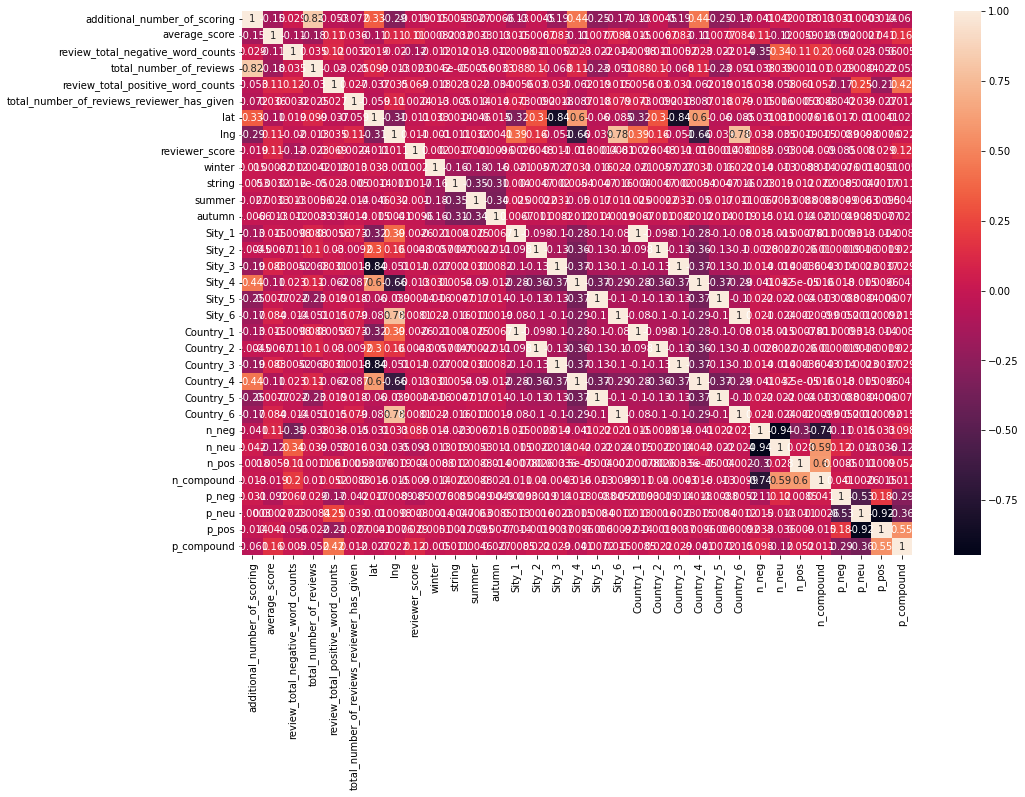

In [21]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data.drop(['sample'], axis=1).corr(), annot=True)

In [26]:
# убираем признаки которые еще не успели обработать, 
# модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
object_columns = [s for s in data.columns if data[s].dtypes == 'object']
data.drop(object_columns, axis = 1, inplace=True)

In [28]:
data = data.drop(columns= 'review_date', axis=1)

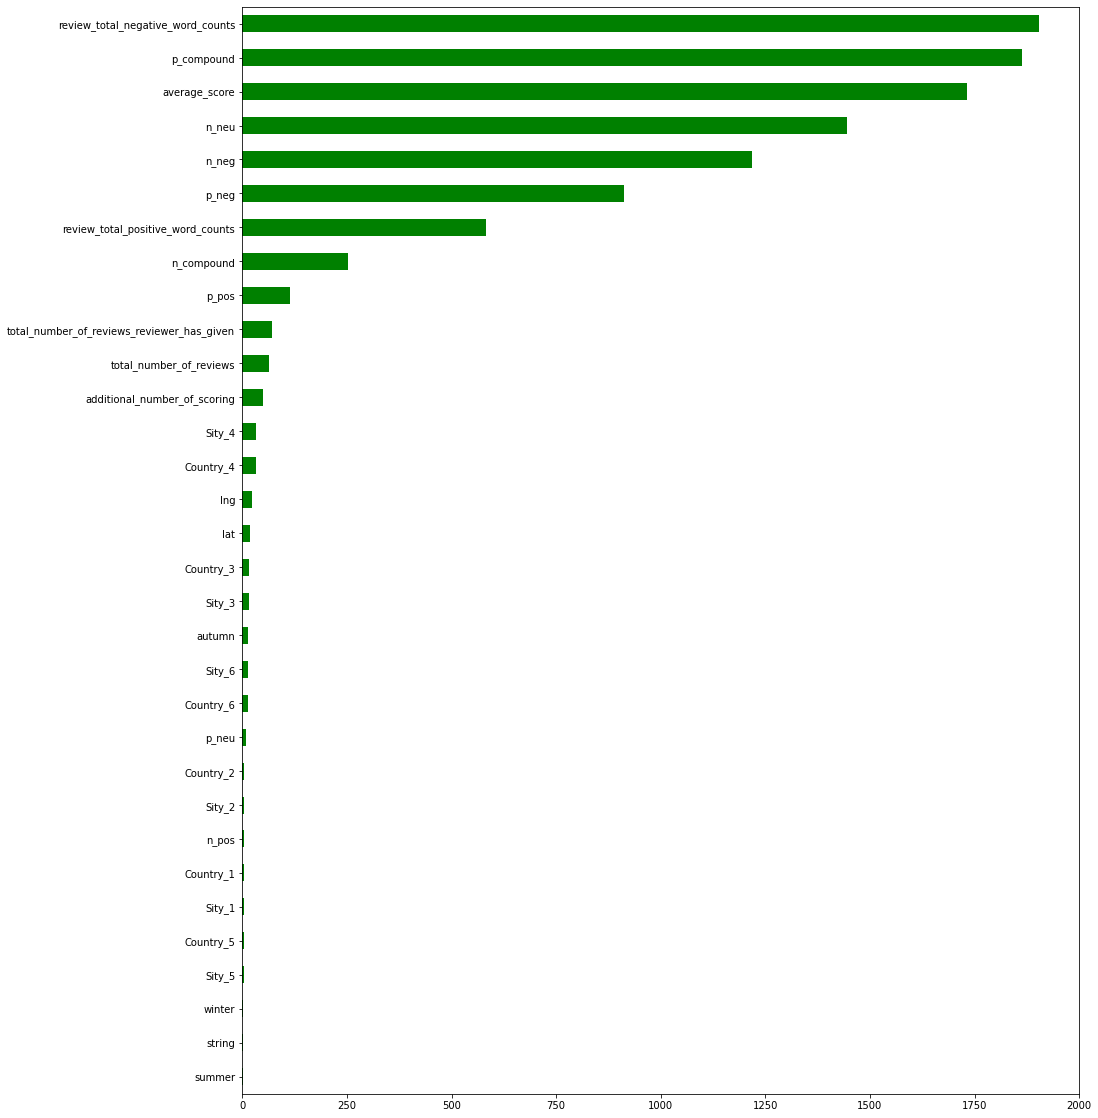

In [29]:
# Смотрим на значимость признаков
from sklearn.feature_selection import f_classif

y = data.query('sample == 1').drop(['sample'], axis=1).reviewer_score.values
X = data.query('sample == 1').drop(['sample', 'reviewer_score'], axis=1)

# визуализируем результат анализа значимости:
imp_num = pd.Series(f_classif(X[X.columns], y)[0], index = X.columns)
imp_num.sort_values(inplace = True)

fig5, ax5 = plt.subplots(figsize=(15, 20))
imp_num.plot(kind = 'barh', color='green');

In [ ]:
y=y.astype('int')

from sklearn.feature_selection import chi2 # хи-квадрат

imp_cat = pd.Series(chi2(X[cat_cols], y)[0], index=cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 34 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                515738 non-null  int64  
 1   average_score                               515738 non-null  float64
 2   review_total_negative_word_counts           515738 non-null  int64  
 3   total_number_of_reviews                     515738 non-null  int64  
 4   review_total_positive_word_counts           515738 non-null  int64  
 5   total_number_of_reviews_reviewer_has_given  515738 non-null  int64  
 6   lat                                         515738 non-null  float64
 7   lng                                         515738 non-null  float64
 8   sample                                      515738 non-null  int64  
 9   reviewer_score                              515738 non-null  float64
 

In [37]:
data = data.drop(columns= 'review_date', axis=1)

In [31]:
# Теперь выделим тестовую часть
train_data = data.query('sample == 1').drop(['sample'], axis=1)
test_data = data.query('sample == 0').drop(['sample'], axis=1)

y = train_data.reviewer_score.values            # наш таргет
X = train_data.drop(['reviewer_score'], axis=1)

In [32]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [33]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((128935, 33), (386803, 33), (386803, 32), (309442, 32), (77361, 32))

In [34]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [35]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [36]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   22.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.1min finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.8s finished


In [37]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAPE:', metrics.mean_absolute_error(y_test, y_pred))

MAPE: 0.8858699951855183


<AxesSubplot:>

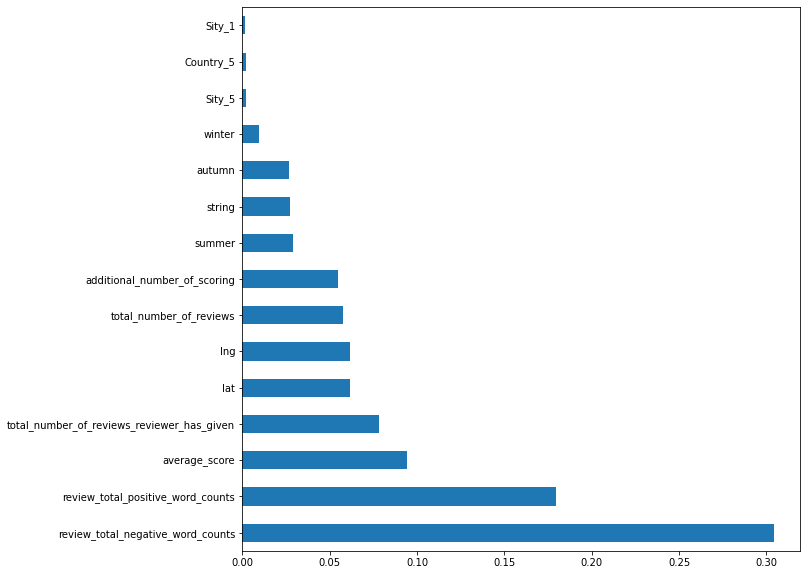

In [47]:
# MAPE: 0.9823059147830514
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

In [38]:
test_data.sample(10)

,additional_number_of_scoring,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,lat,lng,reviewer_score,winter,...,Country_5,Country_6,n_neg,n_neu,n_pos,n_compound,p_neg,p_neu,p_pos,p_compound
28402,930,8.9,0,2836,9,1,51.507271,-0.021121,0.0,0.0,...,0,0,1.000,0.000,0.000,-0.7096,0.000,0.420,0.580,0.7841
8340,1444,7.8,55,5726,13,3,51.493508,-0.183435,0.0,0.0,...,0,0,0.117,0.690,0.193,0.5707,0.000,0.698,0.302,0.4404
110695,191,8.2,68,1852,4,2,48.179189,16.362537,0.0,0.0,...,0,1,0.162,0.751,0.087,-0.7000,0.000,0.196,0.804,0.6249
69897,461,9.2,14,1592,3,2,51.521807,-0.085608,0.0,0.0,...,0,0,0.000,0.608,0.392,0.7003,0.000,0.256,0.744,0.4404
85366,687,8.9,13,2752,5,26,51.515052,-0.159239,0.0,12.0,...,0,0,0.000,1.000,0.000,0.0000,0.000,0.328,0.672,0.6249
51806,1005,8.3,19,3469,0,1,51.559096,-0.284704,0.0,0.0,...,0,0,0.138,0.862,0.000,-0.3724,0.379,0.000,0.621,0.3400
29346,439,8.0,26,3633,2,1,41.393559,2.199391,0.0,0.0,...,0,0,0.059,0.837,0.105,0.2732,0.000,1.000,0.000,0.0000
46515,161,8.6,6,1090,11,42,48.879343,2.357775,0.0,0.0,...,1,0,0.000,1.000,0.000,0.0000,0.000,0.455,0.545,0.8126
57098,197,8.4,50,955,10,6,51.499279,-0.209073,0.0,12.0,...,0,0,0.083,0.834,0.082,0.2357,0.000,0.435,0.565,0.8316
51487,334,8.5,7,2775,5,6,41.385889,2.168165,0.0,0.0,...,0,0,0.264,0.351,0.386,0.2598,0.000,0.408,0.592,0.4404


In [39]:
test_data = test_data.drop(['reviewer_score'], axis=1)

In [40]:
sample_submission

,reviewer_score,id
0,1,488440
1,10,274649
2,3,374688
3,10,404352
4,9,451596
...,...,...
128930,7,495812
128931,1,315577
128932,3,511968
128933,6,303386


In [41]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.5s finished


In [42]:
predict_submission

array([8.663, 7.859, 8.567, ..., 8.633, 9.595, 7.403])

In [43]:
list(sample_submission)

['reviewer_score', 'id']

In [44]:
sample_submission['reviewer_score'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,reviewer_score,id
0,8.663,488440
1,7.859,274649
2,8.567,374688
3,9.798,404352
4,9.598,451596
5,9.267,302161
6,7.785,317079
7,7.507,13963
8,8.078,159785
9,7.526,195089
